In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Ruchitha/Downloads/Titanic-Dataset (1).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("SUMMARY STATISTICS")
df.describe()

SUMMARY STATISTICS


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


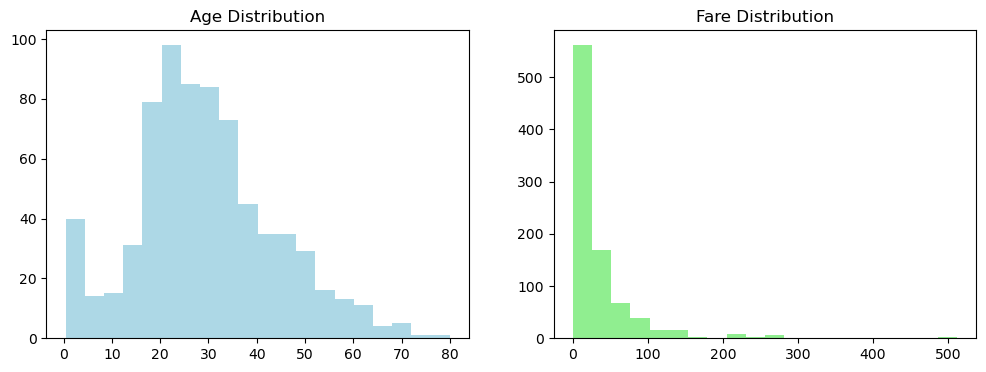

In [4]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=20, color='lightblue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
plt.hist(df['Fare'], bins=20, color='lightgreen')
plt.title('Fare Distribution')

plt.show()

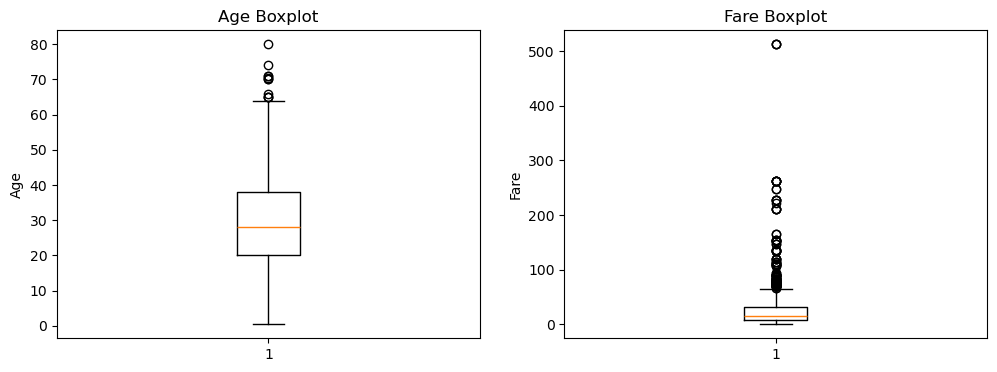

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df['Age'].dropna())
plt.title('Age Boxplot')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
plt.boxplot(df['Fare'])
plt.title('Fare Boxplot')
plt.ylabel('Fare')
plt.show()

CORRELATION MATRIX
               Age      Fare     SibSp     Parch  Survived
Age       1.000000  0.096067 -0.308247 -0.189119 -0.077221
Fare      0.096067  1.000000  0.159651  0.216225  0.257307
SibSp    -0.308247  0.159651  1.000000  0.414838 -0.035322
Parch    -0.189119  0.216225  0.414838  1.000000  0.081629
Survived -0.077221  0.257307 -0.035322  0.081629  1.000000


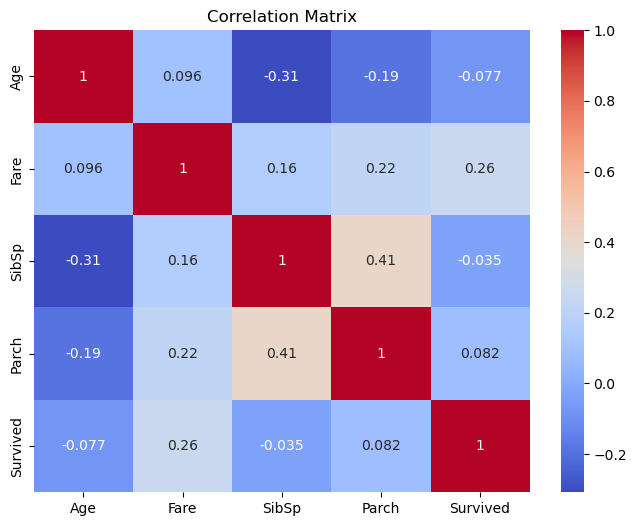

In [6]:
correlation = df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']].corr()
print("CORRELATION MATRIX")
print(correlation)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

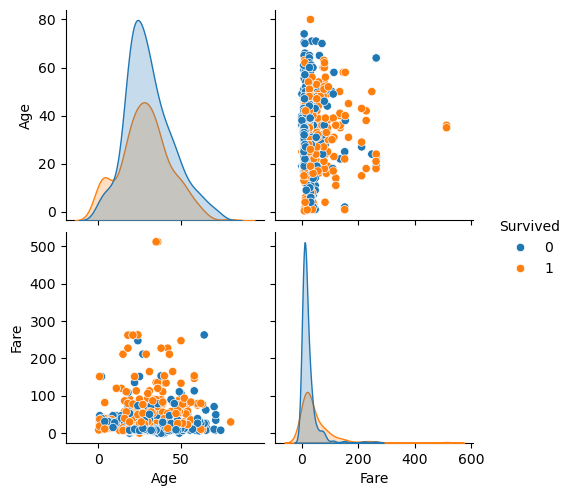

In [7]:
sns.pairplot(df[['Age', 'Fare', 'Survived']], hue='Survived')
plt.show()

In [8]:
print("PATTERNS")
print("Survival by Gender:")
print(df.groupby('Sex')['Survived'].mean())

print("\nSurvival by Class:")
print(df.groupby('Pclass')['Survived'].mean())

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Fare'] < Q1 - 1.5*IQR) | (df['Fare'] > Q3 + 1.5*IQR)]
print(f"\nNumber of fare outliers: {len(outliers)}")

PATTERNS
Survival by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Number of fare outliers: 116


In [9]:
print("KEY INSIGHTS")

print("1. Younger passengers had better survival chances")
print("   Children (Age < 18) survival rate:", df[df['Age'] < 18]['Survived'].mean())
print("   Adults (Age >= 18) survival rate:", df[df['Age'] >= 18]['Survived'].mean())

print("\n2. Higher fare = Better survival")
print("   Cheap tickets (Fare < 50) survival:", df[df['Fare'] < 50]['Survived'].mean())
print("   Expensive tickets (Fare >= 50) survival:", df[df['Fare'] >= 50]['Survived'].mean())

print("\n3. Females had much higher survival rate")
print("   Female survival:", df[df['Sex'] == 'female']['Survived'].mean())
print("   Male survival:", df[df['Sex'] == 'male']['Survived'].mean())

KEY INSIGHTS
1. Younger passengers had better survival chances
   Children (Age < 18) survival rate: 0.5398230088495575
   Adults (Age >= 18) survival rate: 0.3810316139767055

2. Higher fare = Better survival
   Cheap tickets (Fare < 50) survival: 0.31917808219178084
   Expensive tickets (Fare >= 50) survival: 0.6770186335403726

3. Females had much higher survival rate
   Female survival: 0.7420382165605095
   Male survival: 0.18890814558058924


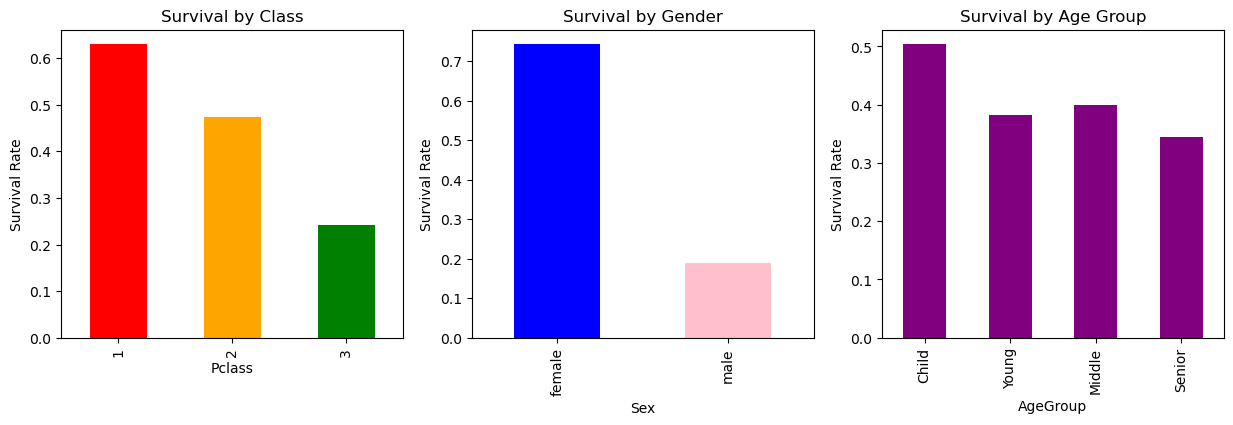

In [11]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
df.groupby('Pclass')['Survived'].mean().plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Survival by Class')
plt.ylabel('Survival Rate')

plt.subplot(1, 3, 2)
df.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['blue', 'pink'])
plt.title('Survival by Gender')
plt.ylabel('Survival Rate')

plt.subplot(1, 3, 3)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=['Child', 'Young', 'Middle', 'Senior'])
df.groupby('AgeGroup', observed=False)['Survived'].mean().plot(kind='bar', color='purple') 
plt.title('Survival by Age Group')
plt.ylabel('Survival Rate')

plt.show()